<h1>Midterms Review</h1>
<hr>

<h2># Adding Imports</h2>

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

<h2># Fetching the Dataset</h2>

In [2]:
chicago = pd.read_csv('DATASET/Chicago_Crimes.csv')

In [3]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    249123 non-null  int64  
 1   Case Number           249123 non-null  object 
 2   Date                  249123 non-null  object 
 3   Block                 249123 non-null  object 
 4   IUCR                  249123 non-null  object 
 5   Primary Type          249123 non-null  object 
 6   Description           249123 non-null  object 
 7   Location Description  248266 non-null  object 
 8   Arrest                249123 non-null  bool   
 9   Domestic              249123 non-null  bool   
 10  Beat                  249123 non-null  int64  
 11  District              249123 non-null  int64  
 12  Ward                  249123 non-null  int64  
 13  Community Area        249120 non-null  float64
 14  FBI Code              249123 non-null  object 
 15  

<h1># Looking for Null Values</h1>
<hr>

In [4]:
chicago.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

In [5]:
chicago['Location Description'] = chicago['Location Description'].fillna('Unknown')
chicago['X Coordinate'] = chicago['X Coordinate'].fillna('Unknown')
chicago['Y Coordinate'] = chicago['Y Coordinate'].fillna('Unknown')
chicago['Latitude'] = chicago['Latitude'].fillna('Unknown')
chicago['Longitude'] = chicago['Longitude'].fillna('Unknown')
chicago['Location'] = chicago['Location'].fillna('Unknown')

In [6]:
chicago.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          3
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

<h1># Changing Datatypes</h1>
<hr>

In [7]:
chicago['Primary Type'] = chicago['Primary Type'].astype('category')
chicago['Location Description'] = chicago['Location Description'].astype('category')
chicago['Year'] = chicago['Year'].astype('category')

In [8]:
chicago['Date'] = pd.to_datetime(chicago['Date'], dayfirst = True, errors = 'coerce')

In [9]:
chicago.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                  category
Description                     object
Location Description          category
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int64
Community Area                 float64
FBI Code                        object
X Coordinate                    object
Y Coordinate                    object
Year                          category
Updated On                      object
Latitude                        object
Longitude                       object
Location                        object
dtype: object

<h1># Adding DateTime Columns</h1>

In [10]:
chicago['Date'].value_counts()

Date
2024-01-11 00:00:00    70
2024-01-05 00:00:00    69
2024-01-06 00:00:00    69
2024-01-08 00:00:00    69
2024-01-09 00:00:00    65
                       ..
2025-11-04 21:40:00     1
2025-11-04 21:43:00     1
2025-11-04 21:45:00     1
2024-06-21 19:33:00     1
2024-04-14 00:14:00     1
Name: count, Length: 126287, dtype: int64

In [11]:
chicago['Month'] = chicago['Date'].dt.month
chicago['Day'] = chicago['Date'].dt.day
chicago['DayofWeek'] = chicago['Date'].dt.dayofweek

<h1>Q1: What are the top 10 highest recorded crimes in chicago's residence area</h1>

<function matplotlib.pyplot.show(close=None, block=None)>

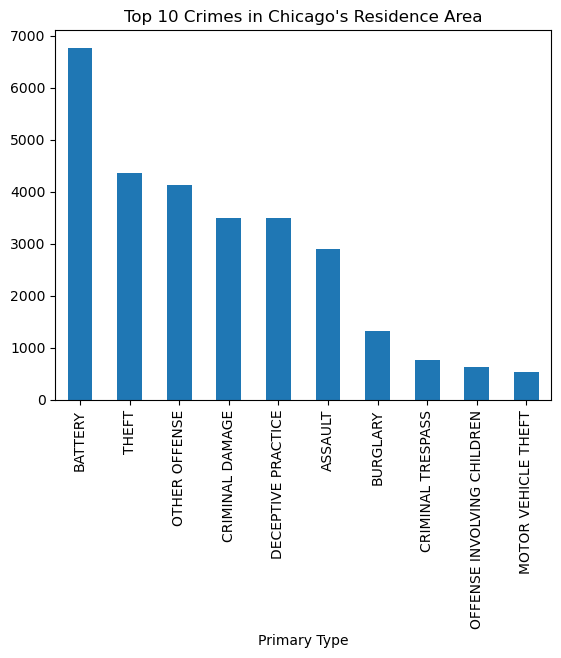

In [12]:
residence_chicago = chicago[chicago['Location Description'] == 'RESIDENCE']
residence_chicago['Primary Type'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Crimes in Chicago's Residence Area")
plt.show

In [13]:
residence_chicago['Primary Type'].value_counts().head(10)

Primary Type
BATTERY                       6769
THEFT                         4350
OTHER OFFENSE                 4134
CRIMINAL DAMAGE               3500
DECEPTIVE PRACTICE            3494
ASSAULT                       2889
BURGLARY                      1328
CRIMINAL TRESPASS              758
OFFENSE INVOLVING CHILDREN     629
MOTOR VEHICLE THEFT            523
Name: count, dtype: int64

<h3>Insight 1: The crime of battery is the highest recorded crime at chicago's residence area for its easy requirement to be prosecuted of said crime</h3>
<h3>Insight 2:</h3>
<h3>Insight 3:</h3>

<h1>Q2: How many Arrest are made during 2025</h1>

In [14]:
chicago['Year'].value_counts()

Year
2024    188918
2025     60205
Name: count, dtype: int64

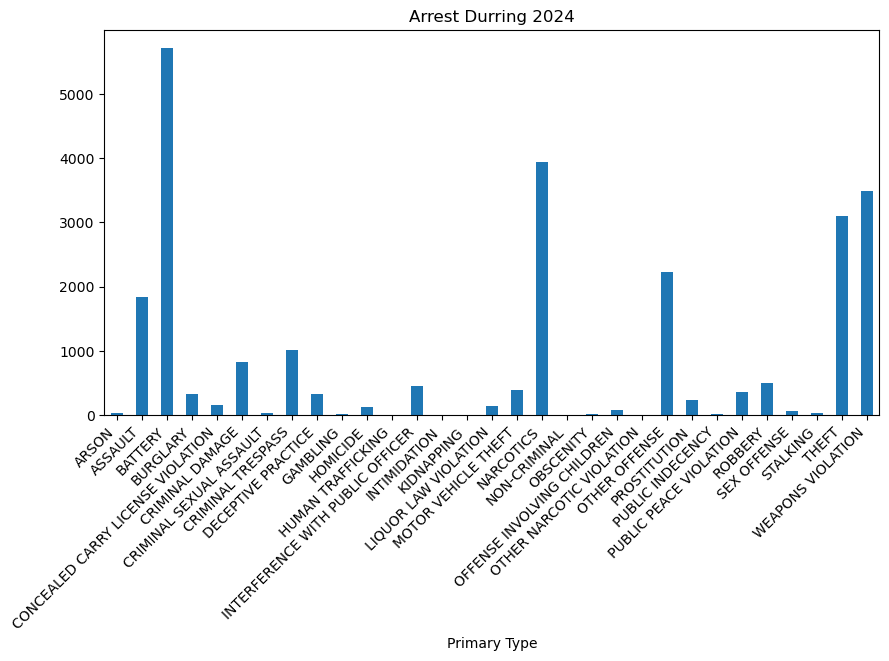

In [15]:
arrest_24 = chicago[(chicago['Year'] == 2024) & (chicago['Arrest'] == True)]
arrest_24.groupby('Primary Type').size().plot(kind='bar')
plt.gcf().set_size_inches(10, 5)
plt.xticks(rotation=45, ha="right")
plt.title('Arrest Durring 2024')
plt.show()

In [16]:
arrest_24.groupby('Primary Type').size()

Primary Type
ARSON                                  24
ASSAULT                              1842
BATTERY                              5713
BURGLARY                              330
CONCEALED CARRY LICENSE VIOLATION     156
CRIMINAL DAMAGE                       827
CRIMINAL SEXUAL ASSAULT                35
CRIMINAL TRESPASS                    1009
DECEPTIVE PRACTICE                    332
GAMBLING                               18
HOMICIDE                              121
HUMAN TRAFFICKING                       0
INTERFERENCE WITH PUBLIC OFFICER      446
INTIMIDATION                            4
KIDNAPPING                              4
LIQUOR LAW VIOLATION                  132
MOTOR VEHICLE THEFT                   382
NARCOTICS                            3948
NON-CRIMINAL                            1
OBSCENITY                              18
OFFENSE INVOLVING CHILDREN             79
OTHER NARCOTIC VIOLATION                2
OTHER OFFENSE                        2223
PROSTITUTION         

<h3>Insight 4:</h3>
<h3>Insight 5:</h3>
<h3>Insight 6:</h3>

<h1>Q3: How many crimes of Battery were commited During 2024 and 2025</h1>

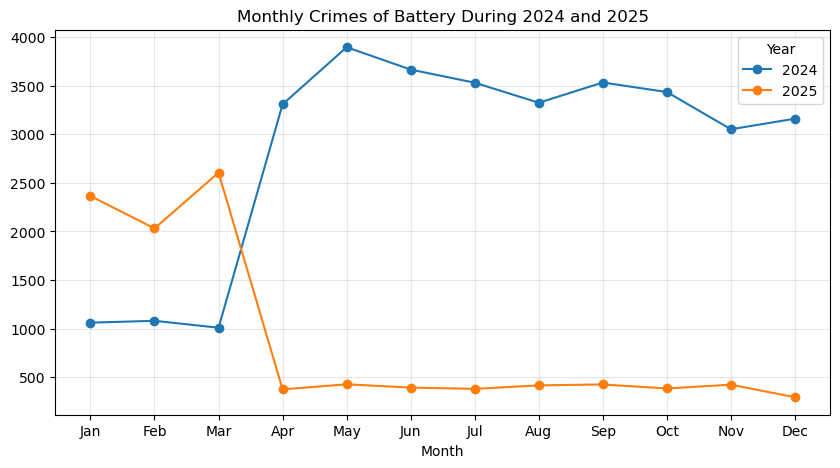

In [17]:
batteries = chicago[chicago['Primary Type'] == 'BATTERY']
battery_monthly = batteries.groupby(['Year', 'Month'])['Case Number'].count()
battery_monthly = battery_monthly.unstack(level=0)
battery_monthly.plot(
                  marker='o', 
                  figsize=(10, 5),
                  title='Monthly Crimes of Battery During 2024 and 2025'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()

In [18]:
batteries['Year'].value_counts()

Year
2024    34052
2025    10527
Name: count, dtype: int64

<h3>Insight 7:</h3>
<h3>Insight 8:</h3>
<h3>Insight 9:</h3>

<h1>Q4: What's the top 15 locations with the highes crime rate in Chicago</h1>

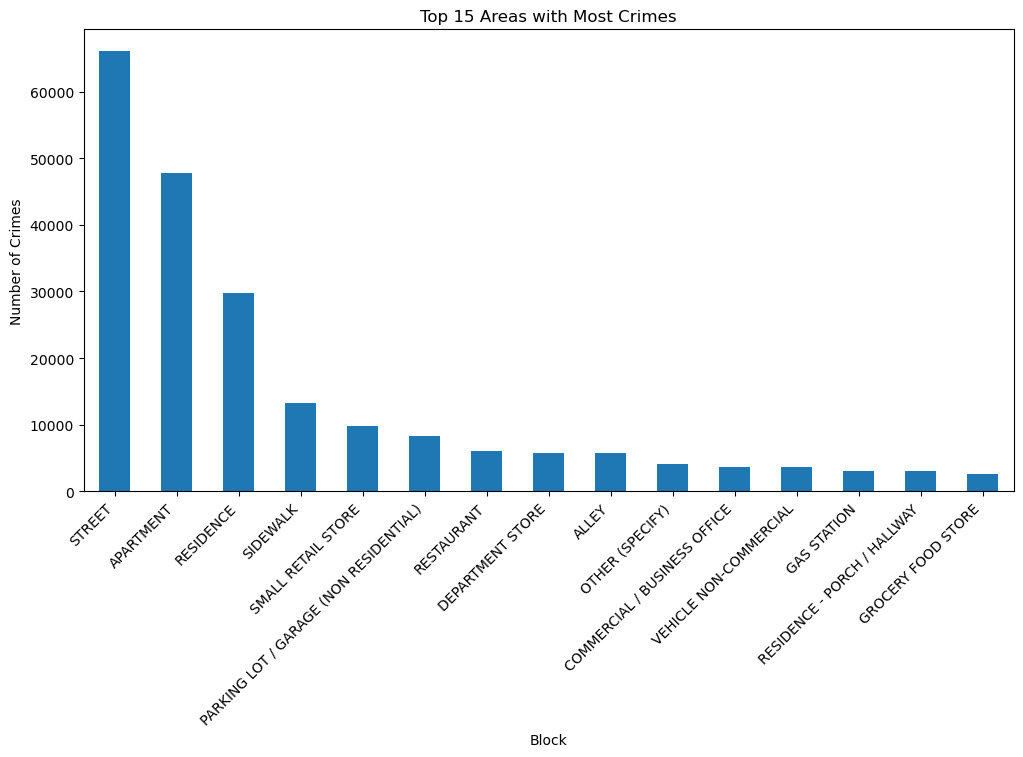

In [19]:
top_areas = chicago['Location Description'].value_counts().head(15)
plt.figure(figsize=(12,6))
top_areas.plot(kind="bar")
plt.title("Top 15 Areas with Most Crimes")
plt.xlabel("Block")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45, ha="right")
plt.show()

<h1>Q5: What's the top 10 locations with the highest domestic crime rate</h1>

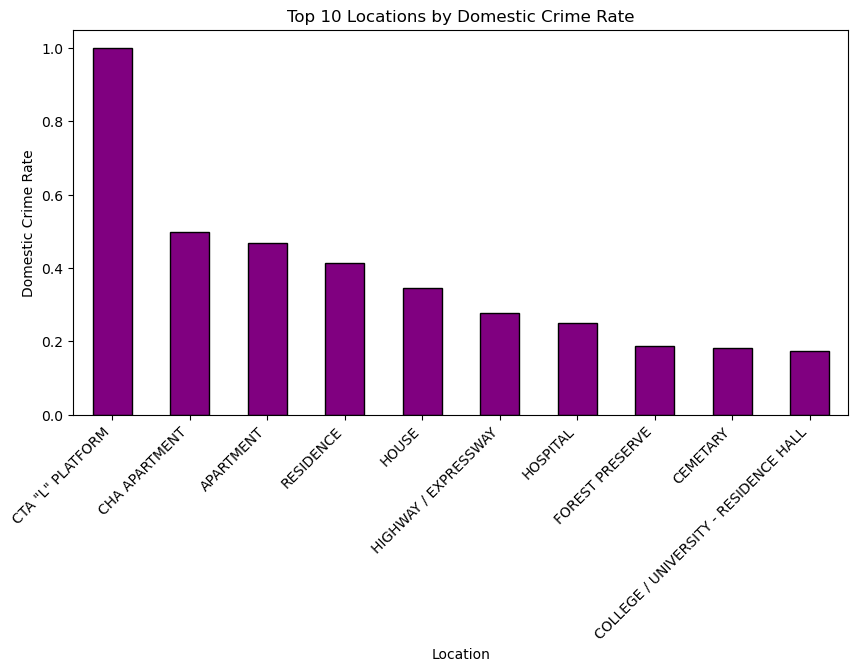

In [20]:
domestic_by_location = chicago.groupby("Location Description")["Domestic"].mean().sort_values(ascending=False)
top10_domestic_locations = domestic_by_location.head(10)

plt.figure(figsize=(10,5))
top10_domestic_locations.plot(kind='bar', color='purple', edgecolor='black')
plt.title("Top 10 Locations by Domestic Crime Rate")
plt.xlabel("Location")
plt.ylabel("Domestic Crime Rate")
plt.xticks(rotation=45, ha="right")
plt.show()


<h1>Q6: Which location is most associated with theft crimes?</h1>

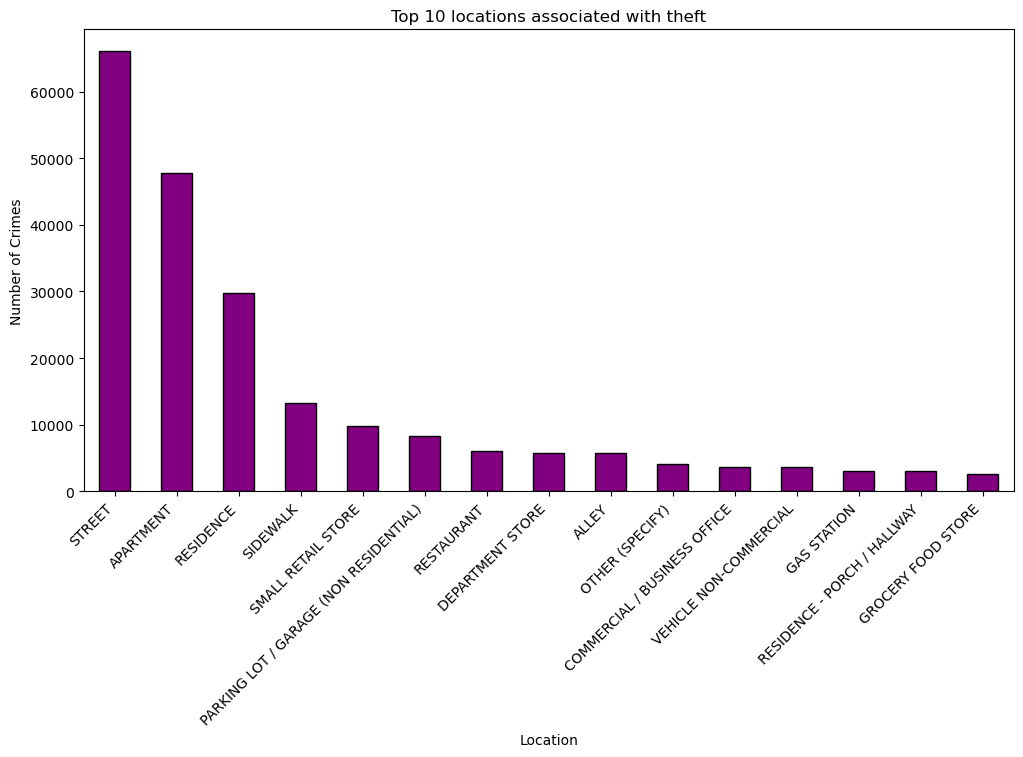

In [37]:
theft = chicago[chicago['Primary Type'] == 'THEFT']
theft_loc = theft['Location Description'].value_counts().head(10)
plt.figure(figsize=(12,6))
top_areas.plot(kind="bar", color='purple', edgecolor='black')
plt.title("Top 10 locations associated with theft")
plt.xlabel("Location")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45, ha="right")
plt.show()

<h1>Q7: Which crime is most often domestic?</h1>

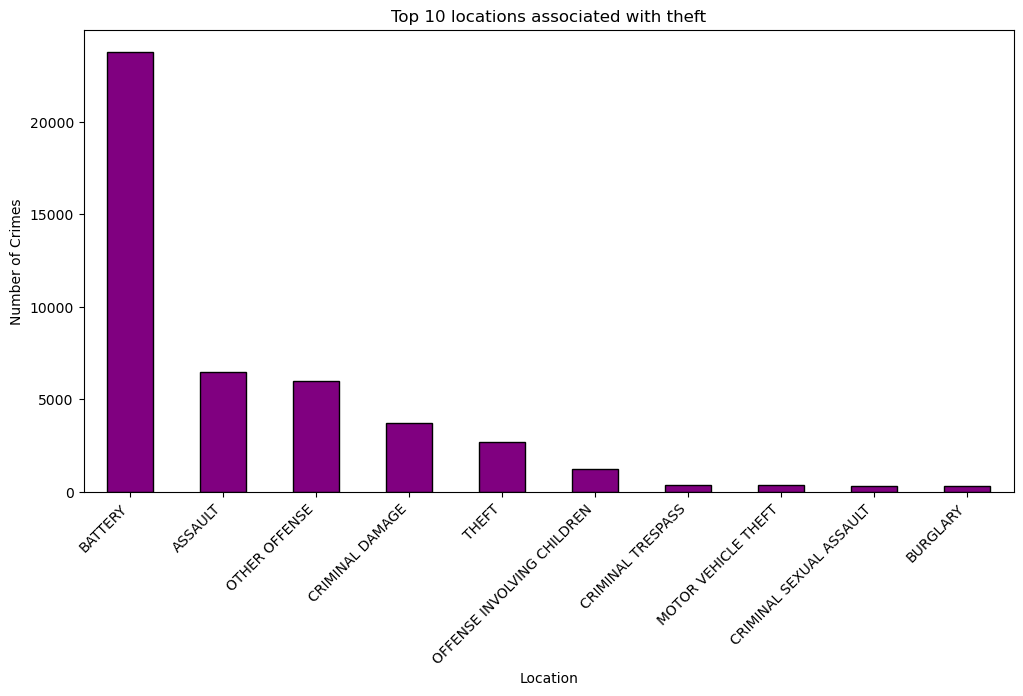

In [41]:
domestic = chicago[chicago['Domestic'] == True]
domestic_crime = domestic['Primary Type'].value_counts().head(10)
plt.figure(figsize=(12,6))
domestic_crime.plot(kind="bar", color='purple', edgecolor='black')
plt.title("Top 10 locations associated with theft")
plt.xlabel("Location")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45, ha="right")
plt.show()

In [42]:
domestic['Primary Type'].value_counts().head(10)

Primary Type
BATTERY                       23764
ASSAULT                        6453
OTHER OFFENSE                  5970
CRIMINAL DAMAGE                3736
THEFT                          2674
OFFENSE INVOLVING CHILDREN     1219
CRIMINAL TRESPASS               375
MOTOR VEHICLE THEFT             351
CRIMINAL SEXUAL ASSAULT         309
BURGLARY                        305
Name: count, dtype: int64

<h1>Q8: Which crime type has the highest arrest rate during 2024</h1>

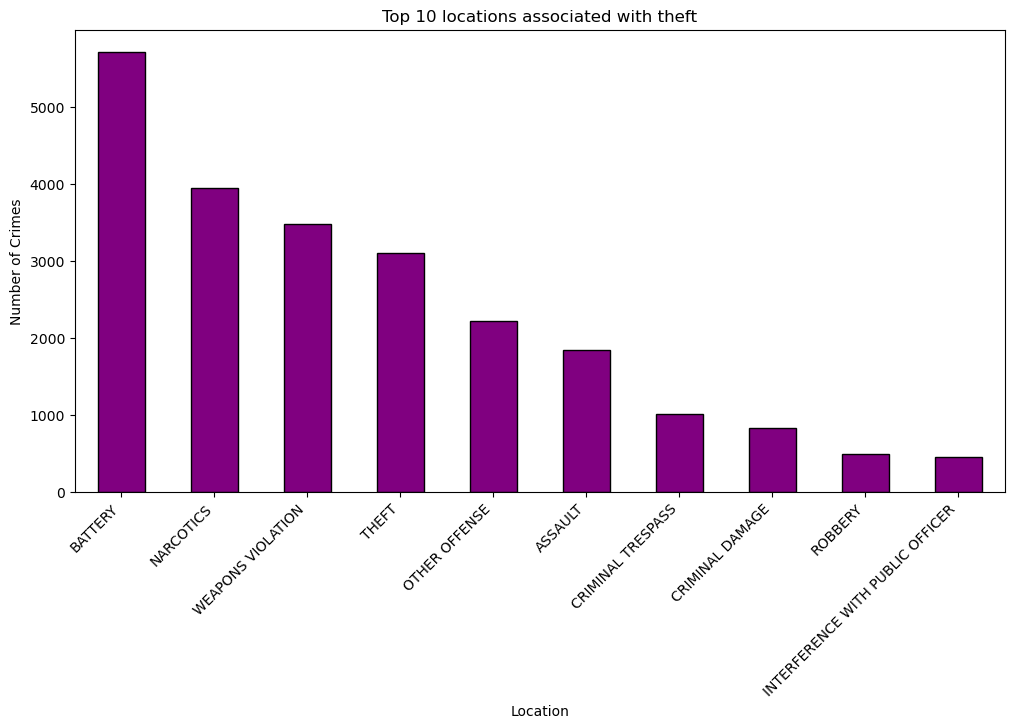

In [43]:
arrest_24 = chicago[(chicago['Arrest'] == True) & (chicago['Year'] == 2024)]
arrest_crime24 = arrest_24['Primary Type'].value_counts().head(10)
plt.figure(figsize=(12,6))
arrest_crime24.plot(kind="bar", color='purple', edgecolor='black')
plt.title("Top 10 locations associated with theft")
plt.xlabel("Location")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45, ha="right")
plt.show()

In [44]:
arrest_24['Primary Type'].value_counts().head(10)

Primary Type
BATTERY                             5713
NARCOTICS                           3948
WEAPONS VIOLATION                   3483
THEFT                               3097
OTHER OFFENSE                       2223
ASSAULT                             1842
CRIMINAL TRESPASS                   1009
CRIMINAL DAMAGE                      827
ROBBERY                              493
INTERFERENCE WITH PUBLIC OFFICER     446
Name: count, dtype: int64